# GRIP - 'The Sparks Foundation'

# Data Science and Business Analytics Internship

# Author - Yukti Taneja

# Task 2 - "Prediction Using Unsupervised ML"



# Importing libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans


# Importing Dataset

In [2]:
# Importing dataset
# read_csv() # to load or import csv file
iris_data = pd.read_csv("c:\\Users\\hp\\Downloads\Iris.csv")
print(iris_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Description about the data

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# DATA VISUALIZATION

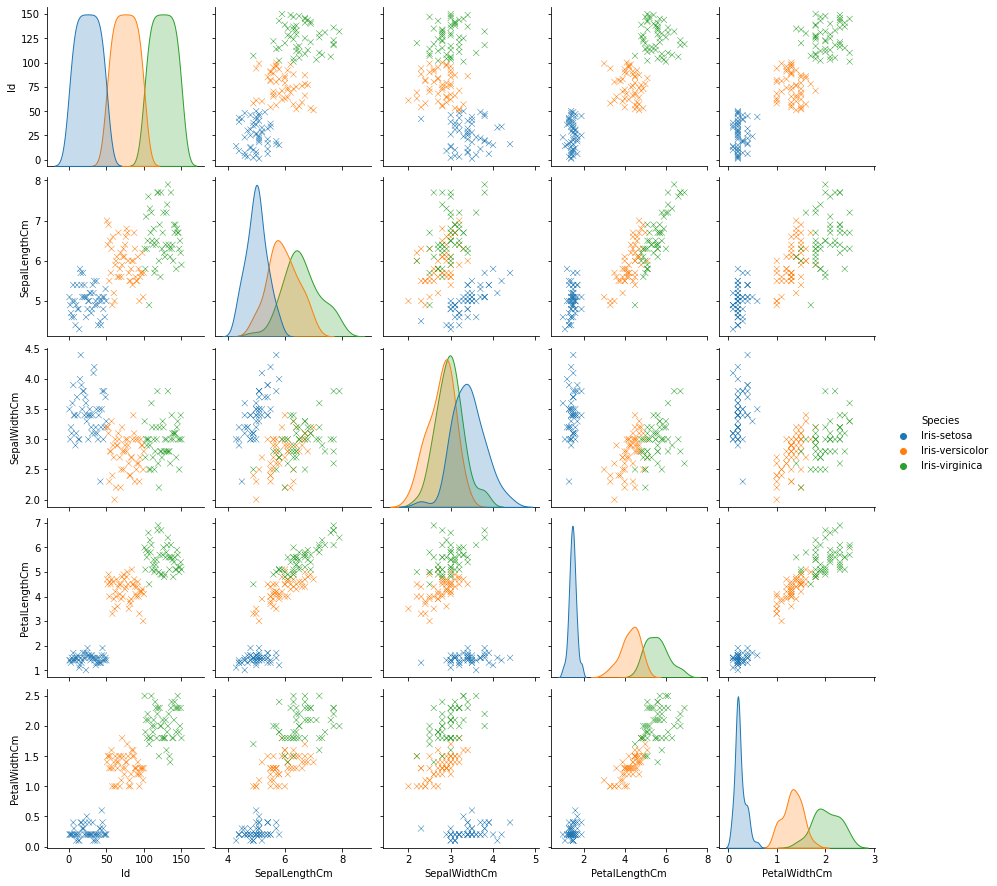

In [6]:
# Visualising relationship between each type of column variable
sns.pairplot(iris_data,hue= 'Species',markers= 'x')
plt.show()

In [7]:
# Dropped unnecessary columns

iris_data.drop("Id",inplace=True,axis=1)
iris_data.drop("Species",inplace=True,axis=1)

<AxesSubplot:>

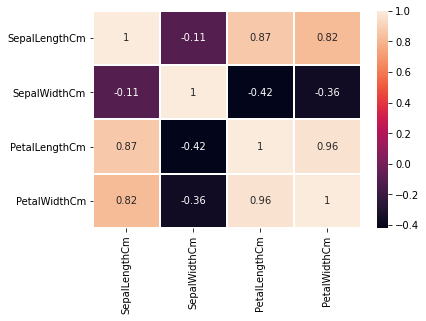

In [20]:
# Plotting Heatmap for showing correlation between each column

sns.heatmap(iris_data.corr(),linecolor = 'white', linewidths = 1, annot = True)

# Elbow method to find out optimum number of clusters

In [9]:
# Calculatig the within-cluster sum of square

within_cluster_sum_of_square = []
x = iris_data.iloc[:,[0,1,2,3]].values

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans (n_clusters=k)
    km = km.fit(iris_data)
    within_cluster_sum_of_square.append(km.inertia_)

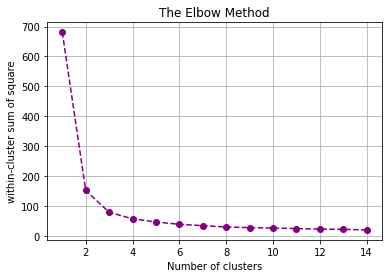

In [10]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range,within_cluster_sum_of_square,'go--', color='purple')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of square')
plt.grid()
plt.show()

# initialization using k-means++

In [11]:
# Applying kmeans to the dataset

model =KMeans (n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10 ,random_state= 0)
y_kmeans = model.fit_predict(iris_data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualizing the clusters

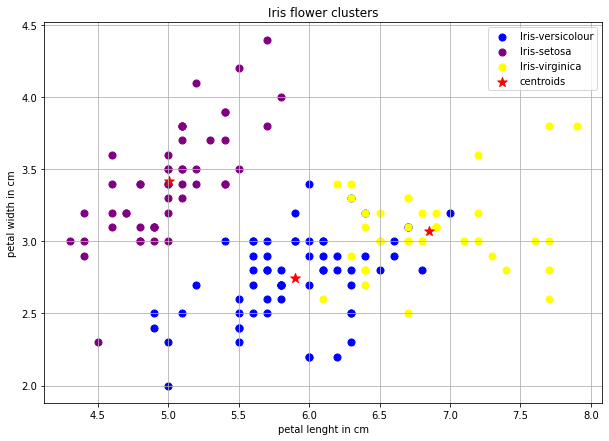

In [19]:
# visualising the clusters

fig = plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s = 50, c ='blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s = 50, c ='purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s = 50, c ='yellow', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100, c ='red',marker = '*', label ='centroids')
plt.title('Iris flower clusters')
plt.ylabel('petal width in cm')
plt.xlabel('petal lenght in cm')
plt.legend()
plt.grid()
plt.show()